<a href="https://colab.research.google.com/github/chris051091/Tesis_Maestria/blob/main/preprocess/src/Testeo_Precipitaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testes - Precipitación

In [76]:
import pandas as pd
import numpy as np
import os
import re
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from google.colab import drive
drive.mount('/content/drive')

%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
PATH_DRIVE = 'drive/MyDrive/Seminario-3-master'
PATH_DADOS = '/preprocess/dados/'
PATH_FIGURE = '/histograms/'

# NOMBRE_ESTACION = 'chucuri'
NOMBRE_ESTACION = 'palanquero'
#NOMBRE_ESTACION = 'vizcaina'

PATH_FINAL_DADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/'
PATH_FINAL_DADOS_TRATADOS = PATH_DRIVE + PATH_DADOS + NOMBRE_ESTACION + '/tratados/'

FILE_DATOS_PROCESADOS = NOMBRE_ESTACION.lower() + '_procesado_10min.csv'
FILE_DATOS_TRATADOS = NOMBRE_ESTACION.lower() + '_tratados_prec.csv'


In [78]:
df = pd.read_csv(PATH_FINAL_DADOS + FILE_DATOS_PROCESADOS,
                 sep = ';',
                 parse_dates = ["FECHA"],
                 date_parser = lambda col: pd.to_datetime(col)
                )

dfVar = df[['FECHA', 'PREC']].copy()
dfVar = dfVar.sort_values(by=['FECHA']).reset_index(drop = True)

# Eliminando datos que no fueron tomados cada 10 min.
# Para chucuri fueron 4 datos

dfVar = dfVar[dfVar['FECHA'].dt.minute % 10 == 0].reset_index(drop = True)
dfVar

,FECHA,PREC
0,2011-01-01 00:10:00-05:00,0.0
1,2011-01-01 00:20:00-05:00,0.0
2,2011-01-01 00:30:00-05:00,0.0
3,2011-01-01 00:40:00-05:00,0.0
4,2011-01-01 00:50:00-05:00,0.0
...,...,...
290605,2017-12-31 23:10:00-05:00,0.0
290606,2017-12-31 23:20:00-05:00,0.0
290607,2017-12-31 23:30:00-05:00,0.0
290608,2017-12-31 23:40:00-05:00,0.0


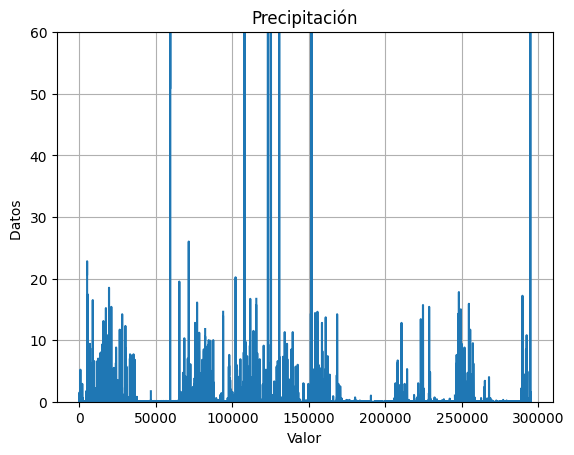

In [79]:
fig, ax = plt.subplots()

# Gráfico del histograma
df['PREC'].plot(kind = 'line')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0,60)
#ax.set_xlim(0,50)
ax.grid(True)
ax.set_xlabel("Valor")
ax.set_title('Precipitación')
ax.set_ylabel("Datos ")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_TOTALES{NOMBRE_ESTACION}.png', format='png')

## Test de rango fijo

In [80]:
prec_max = 20.
prec_min = 0.

lamb_func = lambda r: np.nan if ((r > prec_max) | (r < prec_min)) else r

dfVar['PREC_RANGO_FIJO'] = dfVar['PREC'].apply(lamb_func)
dfVar

,FECHA,PREC,PREC_RANGO_FIJO
0,2011-01-01 00:10:00-05:00,0.0,0.0
1,2011-01-01 00:20:00-05:00,0.0,0.0
2,2011-01-01 00:30:00-05:00,0.0,0.0
3,2011-01-01 00:40:00-05:00,0.0,0.0
4,2011-01-01 00:50:00-05:00,0.0,0.0
...,...,...,...
290605,2017-12-31 23:10:00-05:00,0.0,0.0
290606,2017-12-31 23:20:00-05:00,0.0,0.0
290607,2017-12-31 23:30:00-05:00,0.0,0.0
290608,2017-12-31 23:40:00-05:00,0.0,0.0


<Axes: xlabel='FECHA', ylabel='PREC_RANGO_FIJO'>

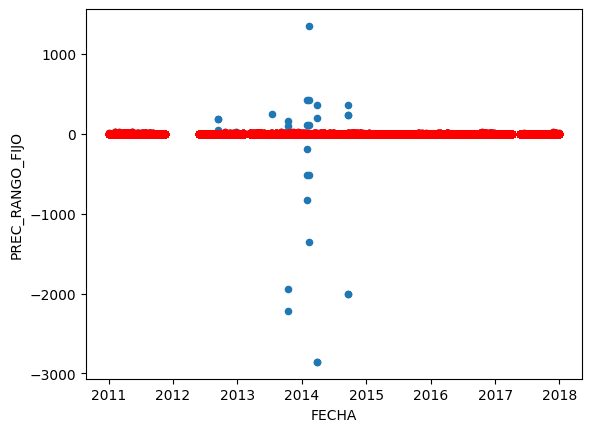

In [81]:
ax = dfVar.plot(kind = 'scatter', x='FECHA', y='PREC')
dfVar.plot(kind = 'scatter', x='FECHA', y='PREC_RANGO_FIJO', ax=ax, color='red')

In [82]:
## Para filtrar los valores finales
dfFinal = dfVar[~dfVar['PREC_RANGO_FIJO'].isnull()].reset_index(drop=True)
dfFinal

,FECHA,PREC,PREC_RANGO_FIJO
0,2011-01-01 00:10:00-05:00,0.0,0.0
1,2011-01-01 00:20:00-05:00,0.0,0.0
2,2011-01-01 00:30:00-05:00,0.0,0.0
3,2011-01-01 00:40:00-05:00,0.0,0.0
4,2011-01-01 00:50:00-05:00,0.0,0.0
...,...,...,...
278093,2017-12-31 23:10:00-05:00,0.0,0.0
278094,2017-12-31 23:20:00-05:00,0.0,0.0
278095,2017-12-31 23:30:00-05:00,0.0,0.0
278096,2017-12-31 23:40:00-05:00,0.0,0.0


In [83]:
print(dfFinal['PREC'].max())
#print(dfFinal['TEMP_MAX_DIARIA'].max())
print(dfFinal['PREC'].mean())

19.6
0.028697437593941697


In [84]:
print(dfFinal['PREC'].min())
#print(dfFinal['TEMP_MIN_DIARIA'].min())

0.0


In [85]:
print(f'Datos iniciales : {dfVar.shape[0]}')
print(f'Datos nulos iniciales : {dfVar[dfVar["PREC"].isnull()].shape[0]}')
dfPrec_null= dfVar[dfVar["PREC"].isnull()]
print(f'Datos nulos después de los testes : {dfFinal[dfFinal["PREC_RANGO_FIJO"].isnull()].shape[0]}')
print(f'Datos finales después de testes : {dfFinal.shape[0]}')
print(f'Datos no nulos que fueron eliminados en los testes : {dfVar.shape[0] - dfFinal.shape[0] - dfVar[dfVar["PREC"].isnull()].shape[0]}')

Datos iniciales : 290610
Datos nulos iniciales : 12480
Datos nulos después de los testes : 0
Datos finales después de testes : 278098
Datos no nulos que fueron eliminados en los testes : 32


In [86]:
(dfFinal[['FECHA', 'PREC_RANGO_FIJO']]
          .rename(columns = {'PREC_RANGO_FIJO' : 'PREC'})
          .to_csv(PATH_FINAL_DADOS_TRATADOS + FILE_DATOS_TRATADOS, header=True, index=False, sep = ';'))

In [87]:
dfPrec_null['FECHA'] = pd.to_datetime(dfPrec_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')

<ipython-input-87-fcfef4adfec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrec_null['FECHA'] = pd.to_datetime(dfPrec_null['FECHA'], format='%Y %m %d %H %M').dt.tz_convert('America/Bogota')


In [88]:
dfPrec_null['HORA_FECHA'] = dfPrec_null['FECHA'].dt.hour
dfPrec_null['MES_FECHA'] = dfPrec_null['FECHA'].dt.month
dfPrec_null['ANO_FECHA'] = dfPrec_null['FECHA'].dt.year
dfPrec_null

<ipython-input-88-e9b4e00f938e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrec_null['HORA_FECHA'] = dfPrec_null['FECHA'].dt.hour
<ipython-input-88-e9b4e00f938e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfPrec_null['MES_FECHA'] = dfPrec_null['FECHA'].dt.month
<ipython-input-88-e9b4e00f938e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

,FECHA,PREC,PREC_RANGO_FIJO,HORA_FECHA,MES_FECHA,ANO_FECHA
21670,2011-05-31 11:50:00-05:00,NaN,NaN,11,5,2011
21671,2011-05-31 12:00:00-05:00,NaN,NaN,12,5,2011
21672,2011-05-31 12:10:00-05:00,NaN,NaN,12,5,2011
21673,2011-05-31 12:20:00-05:00,NaN,NaN,12,5,2011
21674,2011-05-31 12:30:00-05:00,NaN,NaN,12,5,2011
...,...,...,...,...,...,...
260522,2017-04-05 10:10:00-05:00,NaN,NaN,10,4,2017
260527,2017-04-05 11:10:00-05:00,NaN,NaN,11,4,2017
260560,2017-04-06 07:10:00-05:00,NaN,NaN,7,4,2017
260584,2017-04-06 12:10:00-05:00,NaN,NaN,12,4,2017


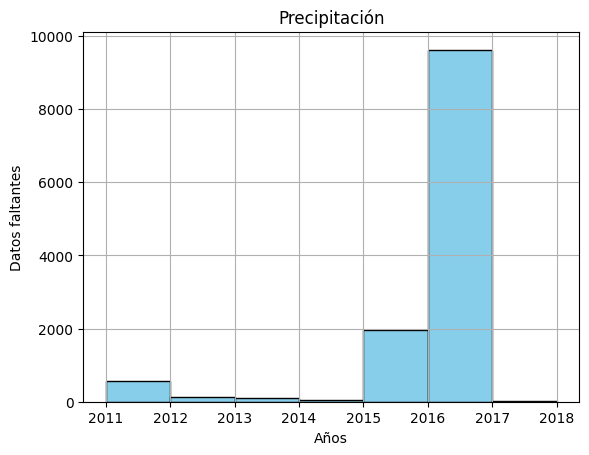

In [89]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPrec_null['ANO_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(2011, 2019))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim()
ax.grid(True)
ax.set_xlabel("Años")
ax.set_xticks(range(2011, 2019))
ax.set_title('Precipitación')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_año_datos_faltantes_prec_{NOMBRE_ESTACION}.png', format='png')

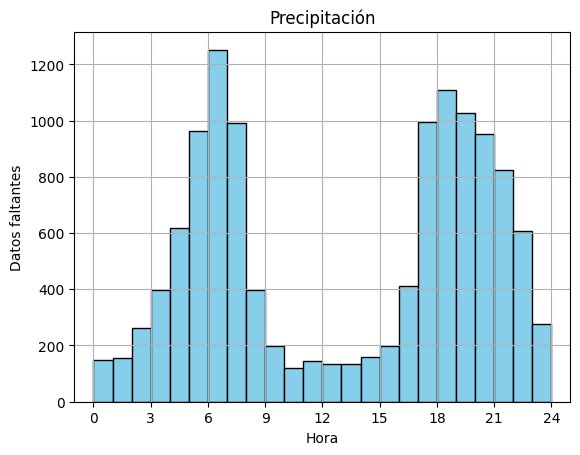

In [90]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPrec_null['HORA_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0, 25))

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['hour_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(-1, 25)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_xticks(range(0, 25, 3))
ax.set_title('Precipitación')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_hora_datos_faltantes_Prec_{NOMBRE_ESTACION}.png', format='png')

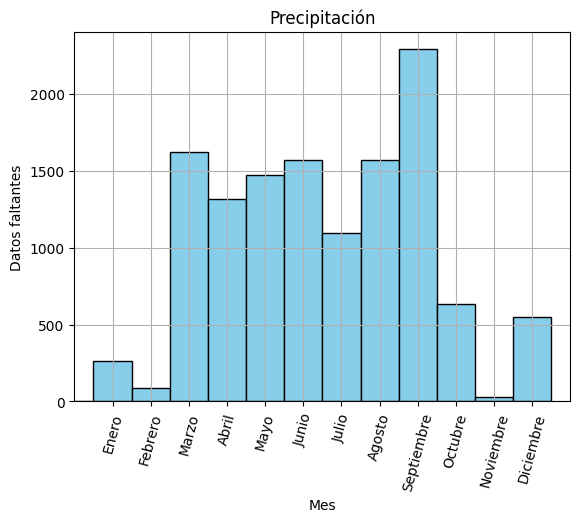

In [91]:
fig, ax = plt.subplots()

# Gráfico del histograma
dfPrec_null['MES_FECHA'].plot(kind = 'hist', ax=ax, edgecolor='black', color='skyblue', bins = range(0,14), align='left')

# # Gráfico de la estimativa de la densidad del kernel en el mismo gráfico sobre el mismo gráfico
# ax2 = df['month_min_t'].plot(kind='kde', secondary_y=True, ax=ax, color='red')
# ax2.set_ylabel("Densidad")

ax.set_ylim(0)
ax.set_xlim(0, 13)
# bins_labels(range(0,14), 20)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_xticks(range(1, 13, 1))
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title('Precipitación')
ax.set_ylabel("Datos faltantes")
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_mes_datos_faltantes_Prec_{NOMBRE_ESTACION}.png', format='png')

## Análisis de datos faltantes

In [92]:
from calendar import isleap

In [93]:
dfEliminados = dfVar[dfVar["PREC_RANGO_FIJO"].isnull()].reset_index(drop=True)[['FECHA', 'PREC']].copy()
dfEliminados['HORA_FECHA'] = dfEliminados['FECHA'].dt.hour
dfEliminados['MES_FECHA'] = dfEliminados['FECHA'].dt.month
dfEliminados['ANO_FECHA'] = dfEliminados['FECHA'].dt.year
dfEliminados['DIAS_EN_MES'] = dfEliminados['FECHA'].dt.days_in_month
dfEliminados['DIAS_EN_ANO'] = dfEliminados["ANO_FECHA"].apply(lambda x:365 + isleap(x))

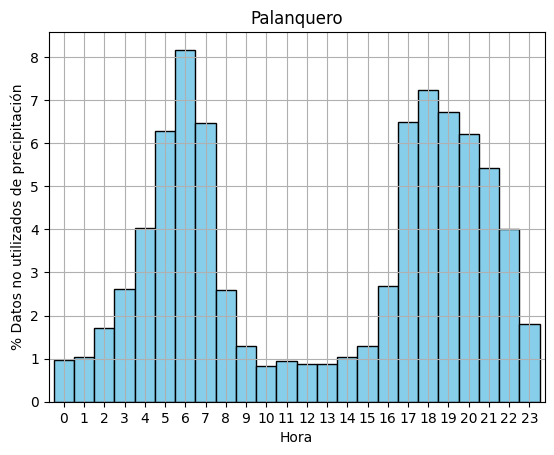

In [94]:
dfEliminados_HORA = (dfEliminados.groupby('HORA_FECHA')
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0])
      )

dfEliminados_HORA["TOTAL_FALTANTES"] = dfEliminados_HORA[("HORA_FECHA", "count")]
dfEliminados_HORA["HORA"] = dfEliminados_HORA[("HORA_FECHA", "")]
dfEliminados_HORA["TOTAL_HORA"] = 7*365*6
dfEliminados_HORA["PORC_HORA_FALTANTE"] = dfEliminados_HORA["TOTAL_FALTANTES"] / dfEliminados_HORA["TOTAL_HORA"] * 100

fig, ax = plt.subplots()

dfEliminados_HORA.plot.bar(x='HORA', y='PORC_HORA_FALTANTE', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Hora")
ax.set_ylabel("% Datos no utilizados de precipitación")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Prec_hora_{NOMBRE_ESTACION}.png', format='png')

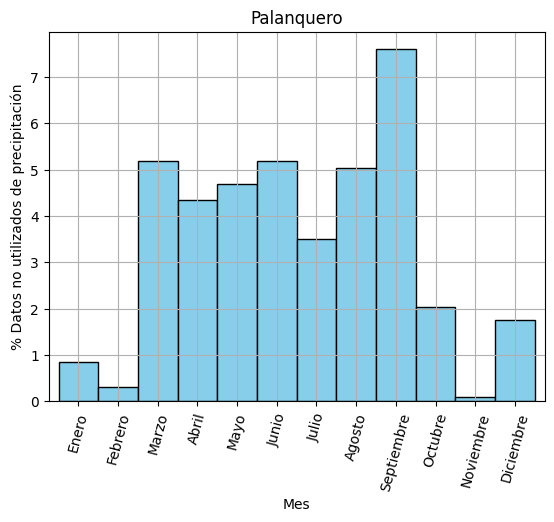

In [95]:
dfEliminados_MES = (dfEliminados
       .groupby(['MES_FECHA', 'ANO_FECHA', 'DIAS_EN_MES'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1, 2])
      )

dfEliminados_MES["TOTAL_FALTANTES"] = dfEliminados_MES[("HORA_FECHA", "count")]
dfEliminados_MES = dfEliminados_MES.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] = dfEliminados_MES['DIAS_EN_MES']*24*7*6
dfEliminados_MES["PORC_DATOS_POR_MES_ANO_FALTANTE"] = dfEliminados_MES["TOTAL_FALTANTES"] / dfEliminados_MES["TOTAL_DATOS_POR_MES_ANO"] * 100
dfEliminados_MES.columns=dfEliminados_MES.columns.droplevel(1)
dfEliminados_MES.reset_index(inplace=True)
dfEliminados_MES = (dfEliminados_MES
       .groupby('MES_FECHA')
       .agg({'PORC_DATOS_POR_MES_ANO_FALTANTE': ['sum']})
       .reset_index(level = [0])
      )
dfEliminados_MES["PORC_MES_FALTANTES"] = dfEliminados_MES[("PORC_DATOS_POR_MES_ANO_FALTANTE", "sum")]

fig, ax = plt.subplots()

dfEliminados_MES.plot.bar(x='MES_FECHA', y='PORC_MES_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Mes")
ax.set_ylabel("% Datos no utilizados de precipitación")
ax.get_legend().remove()
Meses = ['Enero', 'Febrero',
         'Marzo', 'Abril',
         'Mayo', 'Junio',
         'Julio', 'Agosto',
         'Septiembre', 'Octubre',
         'Noviembre', 'Diciembre']
ax.set_xticklabels(Meses, rotation=75)
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Prec_mes_{NOMBRE_ESTACION}.png', format='png')

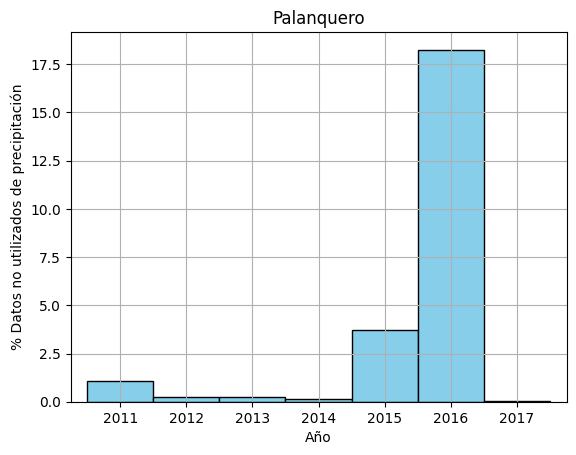

In [96]:
dfEliminados_ANO = (dfEliminados
       .groupby(['ANO_FECHA', 'DIAS_EN_ANO'])
       .agg({'HORA_FECHA': ['count']})
       .reset_index(level = [0, 1])
      )

dfEliminados_ANO["TOTAL_FALTANTES"] = dfEliminados_ANO[("HORA_FECHA", "count")]
dfEliminados_ANO = dfEliminados_ANO.drop(columns=[("HORA_FECHA", "count")])
dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] = dfEliminados_ANO['DIAS_EN_ANO']*24*6
dfEliminados_ANO["PORC_ANO_FALTANTES"] = dfEliminados_ANO["TOTAL_FALTANTES"] / dfEliminados_ANO["TOTAL_DATOS_POR_ANO"] * 100
dfEliminados_ANO
fig, ax = plt.subplots()

dfEliminados_ANO.plot.bar(x='ANO_FECHA', y='PORC_ANO_FALTANTES', rot=0, edgecolor='black', color='skyblue', width=1.0, ax=ax)
ax.grid(True)
ax.set_xlabel("Año")
ax.set_ylabel("% Datos no utilizados de precipitación")
ax.get_legend().remove()
ax.set_title(f'{NOMBRE_ESTACION.capitalize()}')
plt.savefig(PATH_DRIVE + PATH_FIGURE + f'Histograma_datos_faltantes_porcentual_Prec_ano_{NOMBRE_ESTACION}.png', format='png')